# Decision Trees

In [9]:
import numpy as np
import pandas as pd
import sklearn

sklearn.__version__

'1.5.1'

In [2]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [3]:
from pathlib import Path

figures_folder = Path("../Figures")

## Training and Visualizing a Decision Tree

In [4]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris_data = load_iris(as_frame=True)
features = ["petal length (cm)", "petal width (cm)"]
X = iris_data.data[features].values
y = iris_data.target

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2, random_state=42)

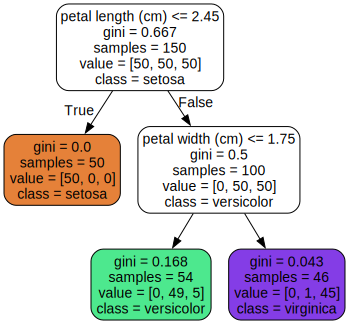

In [6]:
from sklearn.tree import export_graphviz
from graphviz import Source

export_graphviz(
	tree_clf,
	out_file="../Figures/iris_tree.dot",
	feature_names=features,
	class_names=iris_data.target_names,
	rounded=True,
	filled=True
)

Source.from_file("../Figures/iris_tree.dot")

In [16]:
from matplotlib.colors import ListedColormap


def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], legend=False, plot_training=True):
	x1s = np.linspace(axes[0], axes[1], 100)
	x2s = np.linspace(axes[2], axes[3], 100)
	x1, x2 = np.meshgrid(x1s, x2s)
	X_new = np.c_[x1.ravel(), x2.ravel()]
	y_pred = clf.predict(X_new).reshape(x1.shape)
	custom_cmap = ListedColormap(['#fafab0', '#9898ff', '#a0faa0'])
	plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
	if not plot_training:
		return
	plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
	plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
	plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris virginica")
	plt.axis(axes)
	plt.xlabel("Petal length", fontsize=14)
	plt.ylabel("Petal width", fontsize=14)
	if legend:
		plt.legend(loc="upper left", fontsize=14)

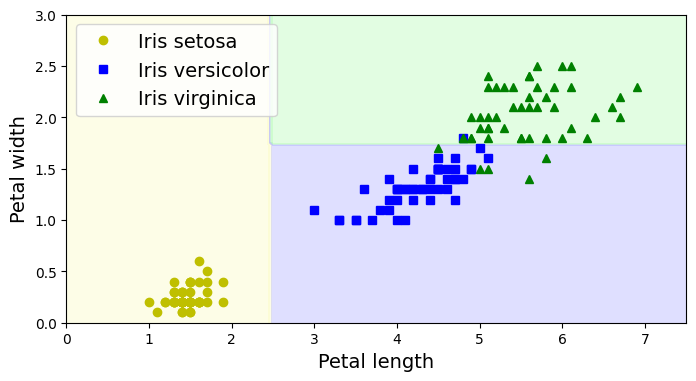

In [17]:
plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y, legend=True)

## Estimating Class Probabilities

In [24]:
new_flower = [[5, 1.5]]
probas = tree_clf.predict_proba(new_flower)
print(probas)
print(iris_data.target_names)
print(iris_data.target_names[tree_clf.predict(new_flower)])

[[0.         0.90740741 0.09259259]]
['setosa' 'versicolor' 'virginica']
['versicolor']


## The CART Training Algorithm

CART algotithm uses the following cost function to split the dataset:

\begin{equation}
J(k, t_k) = \frac{m_{\text{left}}}{m} G_{\text{left}} + \frac{m_{\text{right}}}{m} G_{\text{right}}
\end{equation}

where:

- $G_{\text{left/right}}$ measures the impurity of the left/right subset
- $m_{\text{left/right}}$ is the number of instances in the left/right subset

## Regularization Hyperparameters

In [33]:
# Using moons dataset
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

X, y = make_moons(n_samples=5000, noise=0.3, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf_reg = DecisionTreeClassifier(max_depth=5, random_state=42)
tree_clf_more_reg = DecisionTreeClassifier(max_depth=2, random_state=42)

tree_clf.fit(X_train, y_train)
tree_clf_reg.fit(X_train, y_train)
tree_clf_more_reg.fit(X_train, y_train)

tree_clf.score(X_test, y_test), tree_clf_reg.score(X_test, y_test), tree_clf_more_reg.score(X_test, y_test)

(0.879, 0.911, 0.909)

## Regression